In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

Usage guide:

- Load the function by running the next cell

- Run the cell that starts with "#parameters: run before plotting" 

- In the cell that starts with "# Choose the variable" assign the name of the variable to plot to variable

- Run the next cell

# Function

In [2]:
def fancy_plot_parameters(variable, data_woe, data, dic):
    
    dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1])}
    
    xlabels = []
    bars    = []
    woes    = []
    
    maxs    = []
    
    for key in dic.keys():
        
        max_d = data[np.abs(data_woe[variable] - dic[key]) < 0.0001][variable].max() #max
        min_d = data[np.abs(data_woe[variable] - dic[key]) < 0.0001][variable].min() #min
        pop = np.sum(np.abs(data_woe[variable] - dic[key]) < 0.0001)
        maxs.append(max_d)

        woes.append(dic[key])
        bars.append(pop)
        if key == 'nan':
            xlabels.append('nan')
        else:
            xlabels.append('[{} , {}]'.format(min_d,max_d))
    
    maxs = np.array(maxs)
    maxs_au = maxs[~np.isnan(maxs)]

    try:
        do = maxs_au[0] > maxs_au[1]
    except IndexError: 
        do = False
    
    if do:
        reverse = lambda x: x[::-1]
        
        xlabels = reverse(xlabels)
        bars    = reverse(bars)
        woes    = reverse(woes)
        
        
    return xlabels, bars, woes

def fancy_plot (variable, data_woe, data, dic, save = False, name = None):
    
    xlabels, bars, woes = fancy_plot_parameters(variable, data_woe, data, dic)
    print(bars)
    fig,ax=plt.subplots()
    
    plt.style.use('fivethirtyeight')

    ax.bar(xlabels, bars ,color="blue")

    ax2=ax.twinx()

    plt.style.use('default')

    ax2.plot(xlabels, woes, marker="o",color = "red")

    ax.set_xticklabels(xlabels, rotation = 90)
    ax.set_xlabel('Set')
    ax.set_ylabel('Number of samples')
    ax2.set_ylabel('WoE')
    
    if name != None:
        plt.title('Counts and WoE vs Bins for {} in {}'.format(name, variable))

    if save:
        name = 'Figures/Plot pop & woe vs bins of {} with restriction {}.png'.format(variable, name)
        plt.savefig(name)
    
    plt.show()
    

# Parameters and code

In [3]:
#parameters: run before plotting

data_woe_positive = pd.read_csv('Output_xgboost_positive/Training_positive_woe.csv.gz', compression='gzip')
data_woe_negative = pd.read_csv('Output_xgboost_negative/Training_negative_woe.csv.gz', compression='gzip')
data_woe_best     = pd.read_csv('Output_xgboost_binning/Training_with_woe_on_numerical.csv.gz', compression='gzip')

data     = pd.read_csv('Output_preprocessing/Training_set_woe_cat.csv.gz', compression='gzip')

f = open('Dics_bin_woe/dic_positive.txt','r')
dic_positive = eval(f.read())
f.close()

f = open('Dics_bin_woe/dic_negative.txt','r')
dic_negative = eval(f.read())
f.close()

f = open('Dics_bin_woe/dic_best.txt','r')
dic_best = eval(f.read())
f.close()

In [5]:
# All variables: uncomment and run to see em

# list(dic_positive.keys())

In [19]:
# Look for a variable

word = 'inst'

for variable in dic_positive.keys():
    if word in variable.lower():
        print(variable)

CNT_INSTALMENT
CNT_INSTALMENT_FUTURE
NUM_INSTALMENT_VERSION
NUM_INSTALMENT_NUMBER
DAYS_INSTALMENT
AMT_INSTALMENT
AMT_INST_MIN_REGULARITY
CNT_INSTALMENT_MATURE_CUM


In [10]:
# Choose the variable

variable = 'DAYS_BIRTH'

[56480, 7821, 31923, 15692, 18248, 25239, 1928, 9473, 13895, 65309]


<ipython-input-2-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


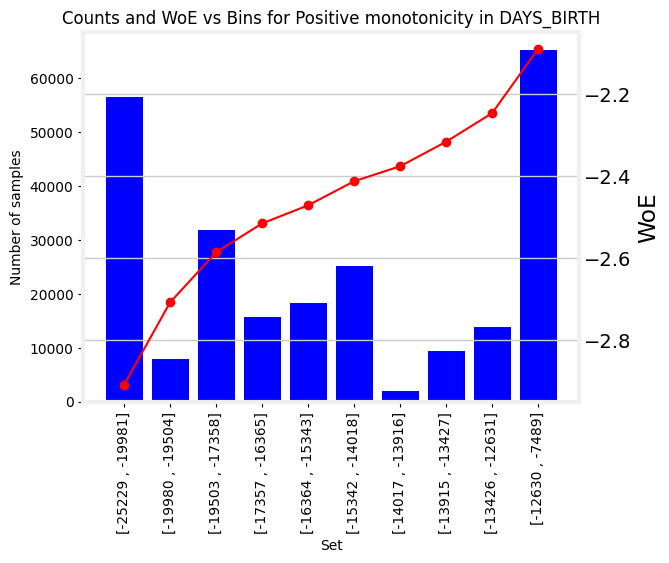

[246008]


<ipython-input-2-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


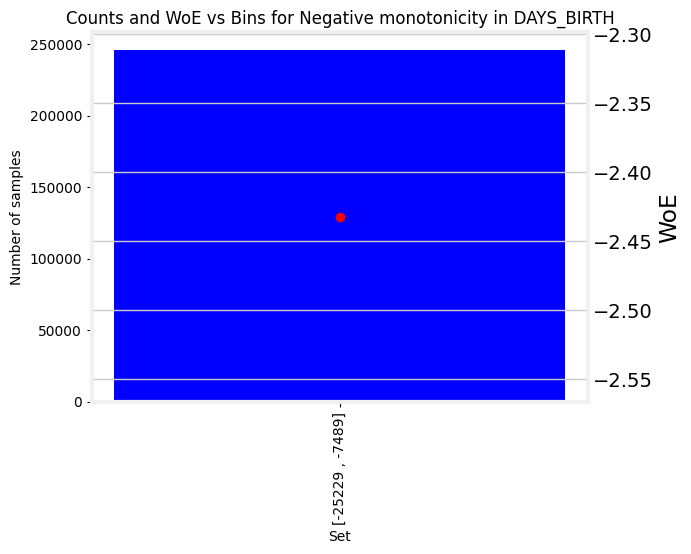

[64301, 31923, 15692, 43487, 1928, 9473, 12301, 66903]


<ipython-input-2-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


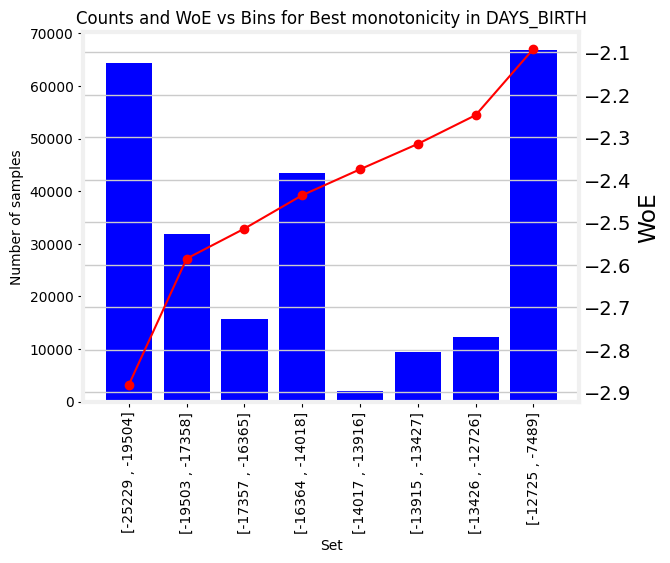

In [11]:
data_woe = [data_woe_positive,data_woe_negative, data_woe_best]
names    = ['Positive monotonicity', 'Negative monotonicity', 'Best monotonicity']

dic      =  [dic_positive, dic_negative, dic_best]

for index in range(len(data_woe)):
    fancy_plot(variable, data_woe[index], data, dic[index][variable], save = False, name = names[index])

CNT_CHILDREN
[172232, 73776]


<ipython-input-3-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


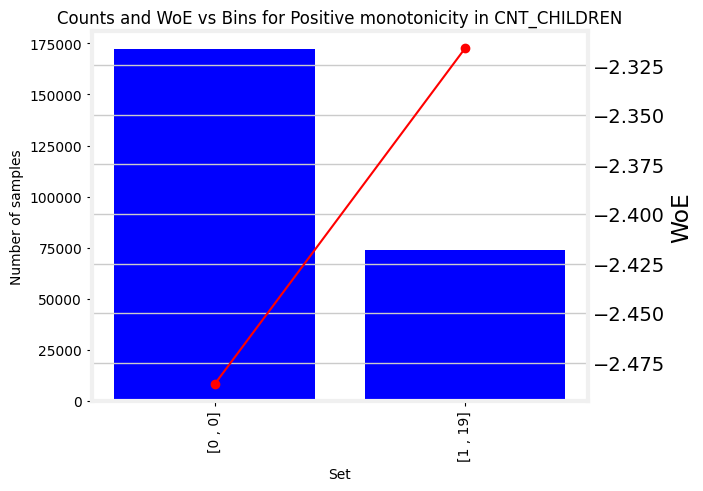

[246008]


<ipython-input-3-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


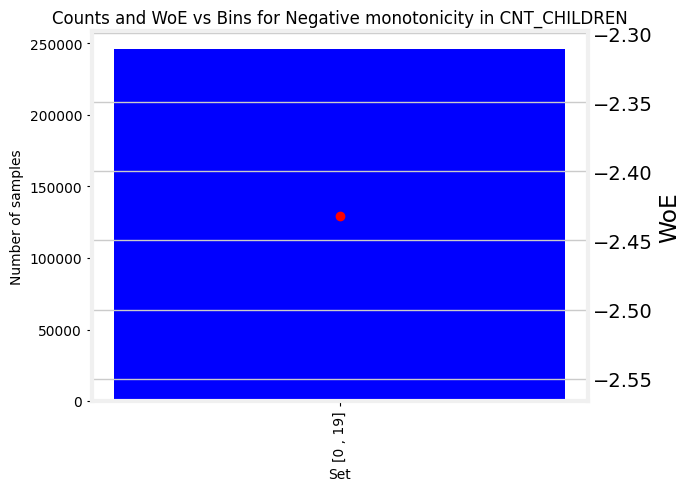

[172232, 73776]


<ipython-input-3-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


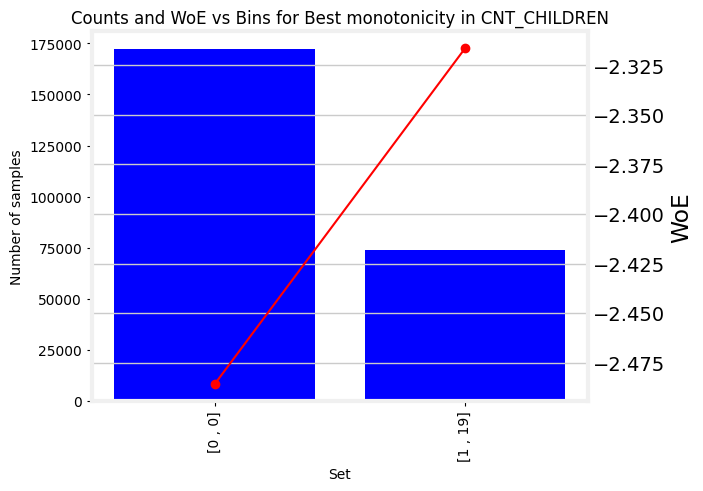

AMT_INCOME_TOTAL
[6962, 239046]


<ipython-input-3-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


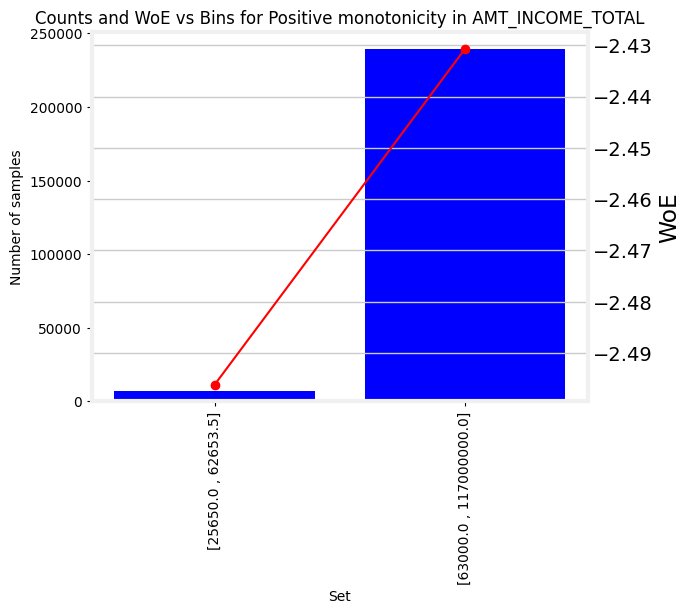

[190270, 18108, 6352, 13638, 17640]


<ipython-input-3-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


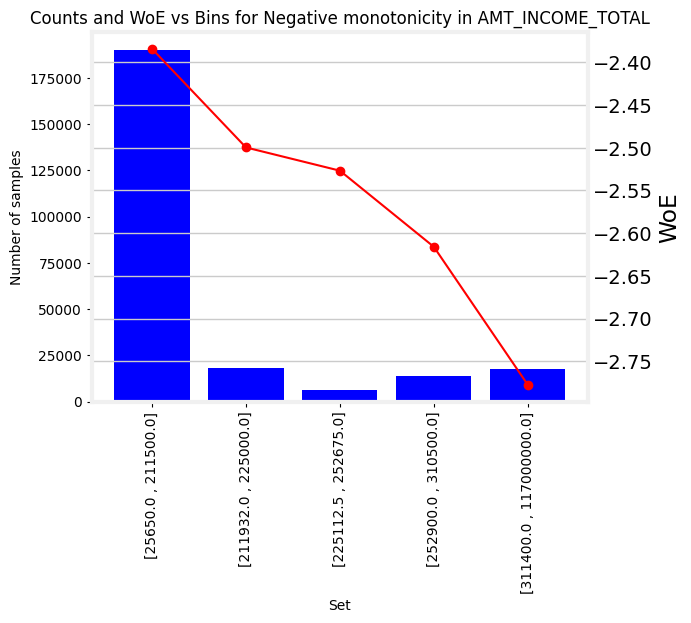

[190270, 18108, 6352, 13638, 17640]


<ipython-input-3-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


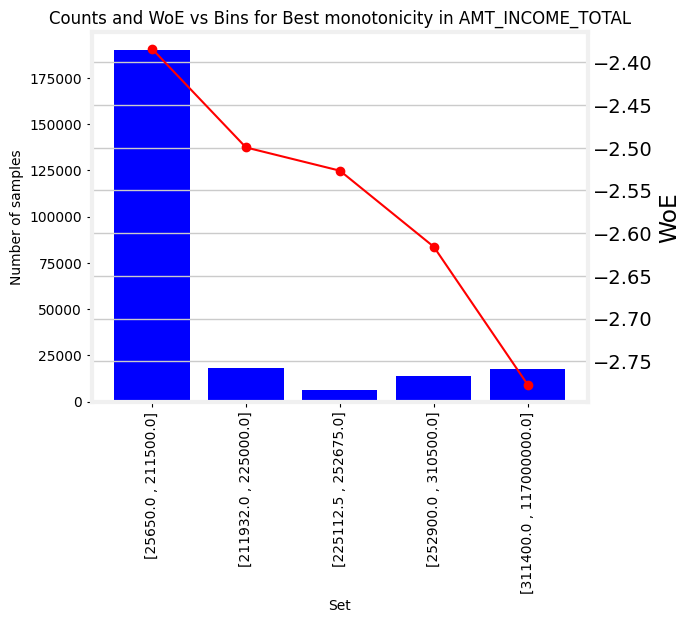

AMT_CREDIT_x
[17378, 228630]


<ipython-input-3-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


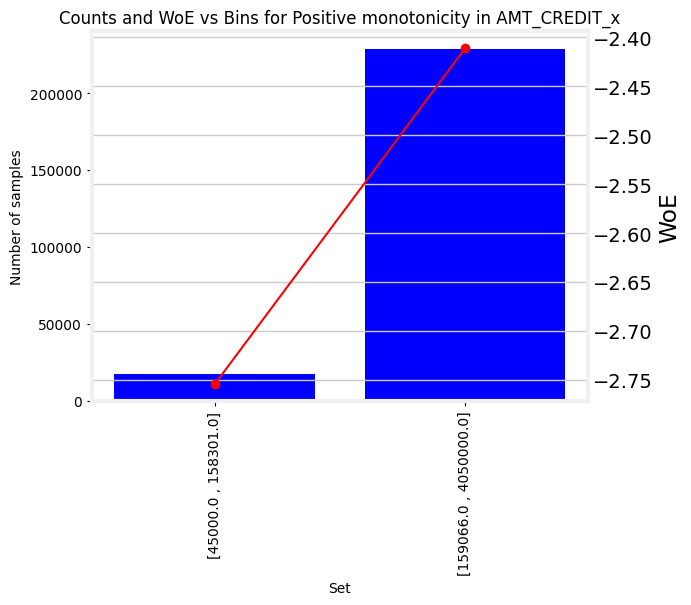

[155779, 33466, 28677, 28086]


<ipython-input-3-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


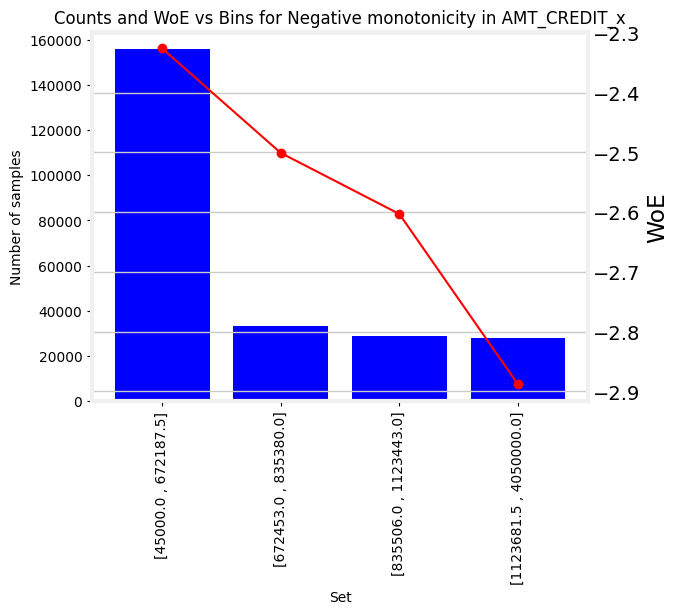

[155779, 38023, 52206]


<ipython-input-3-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


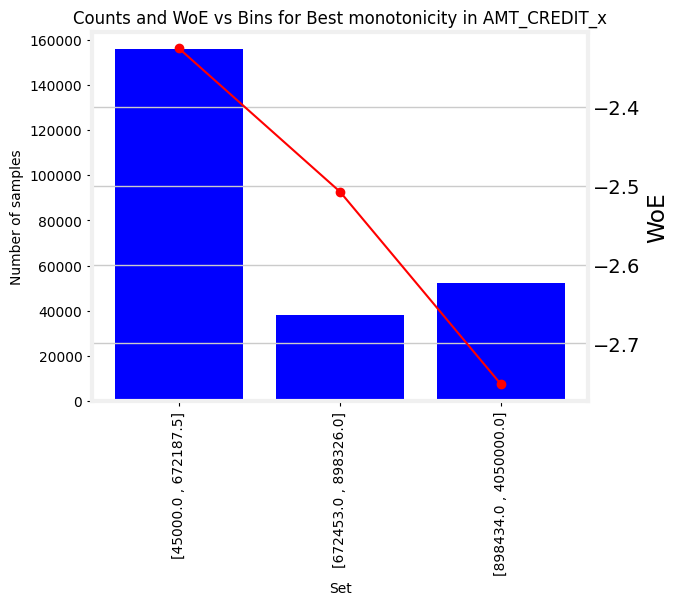

AMT_ANNUITY_x
[42708, 17742, 185548]


<ipython-input-3-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


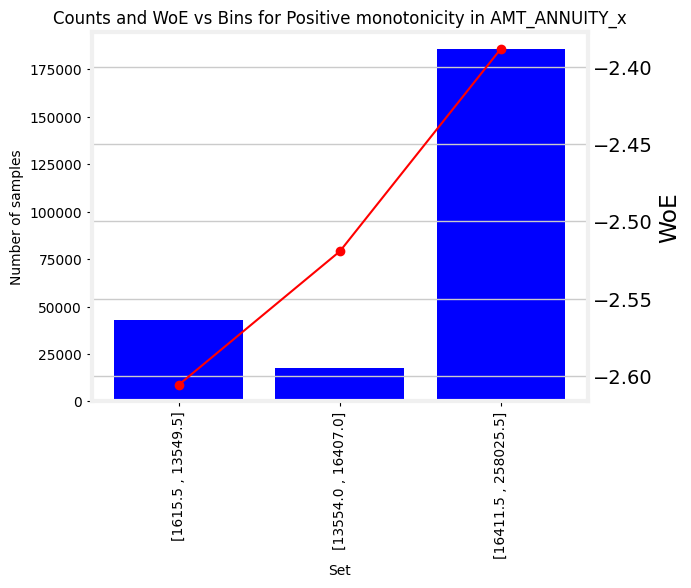

[216358, 6103, 18338, 5199]


<ipython-input-3-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


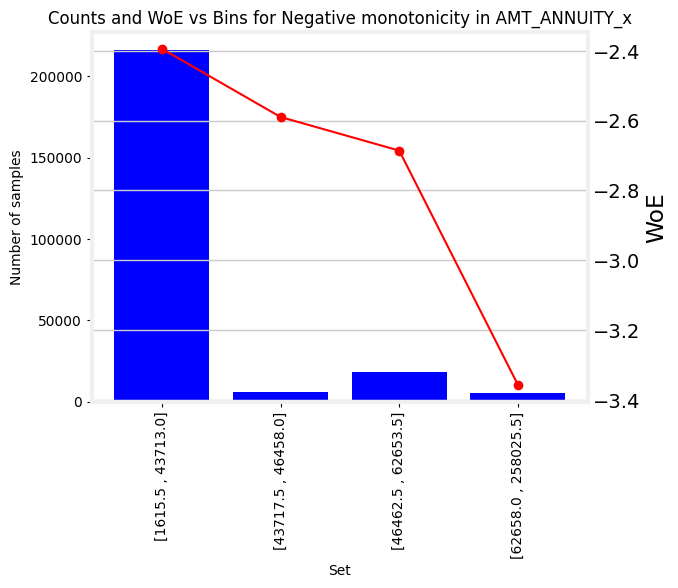

[210437, 5935, 6089, 18338, 5199]


<ipython-input-3-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


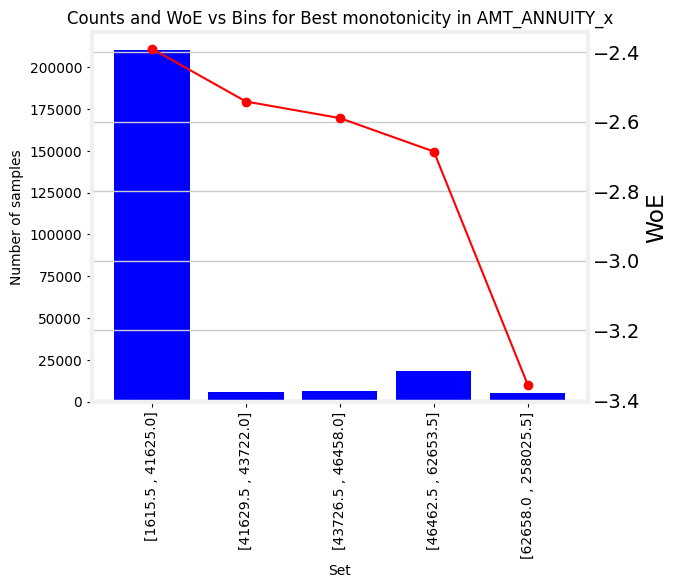

AMT_GOODS_PRICE_x
[1271, 4954, 11198, 4725, 221, 223639]


<ipython-input-3-4f68f7eff192>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 90)


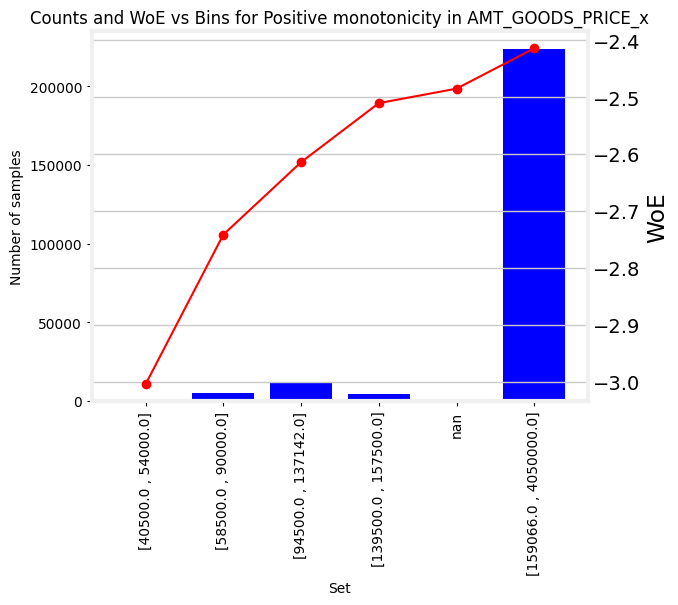

KeyboardInterrupt: 

In [18]:
for variable in list(dic_positive.keys()):
    
    print(variable)
    
    data_woe = [data_woe_positive,data_woe_negative, data_woe_best]
    names    = ['Positive monotonicity', 'Negative monotonicity', 'Best monotonicity']

    dic      =  [dic_positive, dic_negative, dic_best]

    for index in range(len(data_woe)):
        fancy_plot(variable, data_woe[index], data, dic[index][variable], save = False, name = names[index])